In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from config import openweatherkey

#city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
latlngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
latlngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for latlngs in latlngs:
    city = citipy.nearest_city(latlngs[0], latlngs[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

In [3]:
# OpenWeatherMap API Key
api_key = openweatherkey

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []



# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        print(city_url)
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

        
        

Processing Record 1 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=barrow
Processing Record 2 of Set 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=tasiilaq
Processing Record 3 of Set 1 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | antigonish
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=antigonish
Processing Record 5 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=dikson
Processing Record 6 of Set 1 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=port elizabeth
Processing Record 7 of Set 1 | bethel
http:/

City not found. Skipping...
Processing Record 7 of Set 2 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=ribeira grande
Processing Record 8 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=bluff
Processing Record 9 of Set 2 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=sao joao da barra
Processing Record 10 of Set 2 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=new norfolk
Processing Record 11 of Set 2 | sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=sabha
Processing Record 12 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=tiksi
Processing Record 13 of Set 2 | matamey

Processing Record 10 of Set 3 | exeter
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=exeter
Processing Record 11 of Set 3 | urulga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=urulga
City not found. Skipping...
Processing Record 12 of Set 3 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=vostok
Processing Record 13 of Set 3 | mujiayingzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=mujiayingzi
Processing Record 14 of Set 3 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=victoria
Processing Record 15 of Set 3 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=chuy
Processing Record 16 of Set 3 | halalo
http://api.openweathermap.org

Processing Record 12 of Set 4 | kiunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=kiunga
Processing Record 13 of Set 4 | yining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=yining
Processing Record 14 of Set 4 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=ugoofaaru
Processing Record 15 of Set 4 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=sitka
Processing Record 16 of Set 4 | manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=manta
Processing Record 17 of Set 4 | rafai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=rafai
Processing Record 18 of Set 4 | severnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 15 of Set 5 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=itarema
Processing Record 16 of Set 5 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=faya
Processing Record 17 of Set 5 | houma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=houma
Processing Record 18 of Set 5 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=pangnirtung
Processing Record 19 of Set 5 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=kodiak
Processing Record 20 of Set 5 | yaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=yaan
Processing Record 21 of Set 5 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

City not found. Skipping...
Processing Record 19 of Set 6 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=grand gaube
Processing Record 20 of Set 6 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=kavaratti
Processing Record 21 of Set 6 | khilok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=khilok
Processing Record 22 of Set 6 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=saleaula
City not found. Skipping...
Processing Record 23 of Set 6 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=paamiut
Processing Record 24 of Set 6 | zhanaozen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=zhanaozen
Processing Record 25 o

Processing Record 22 of Set 7 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=bathsheba
Processing Record 23 of Set 7 | quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=quelimane
Processing Record 24 of Set 7 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=meulaboh
Processing Record 25 of Set 7 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=narsaq
Processing Record 26 of Set 7 | inverell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=inverell
Processing Record 27 of Set 7 | darnah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=darnah
Processing Record 28 of Set 7 | lashio
http://api.openweathermap.org/data/2.5/weather?

Processing Record 26 of Set 8 | san felipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=san felipe
Processing Record 27 of Set 8 | rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=rio grande
Processing Record 28 of Set 8 | kalamare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=kalamare
Processing Record 29 of Set 8 | kilindoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=kilindoni
Processing Record 30 of Set 8 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=nantucket
Processing Record 31 of Set 8 | bijar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=bijar
Processing Record 32 of Set 8 | sulangan
http://api.openweathermap.org/data/

Processing Record 31 of Set 9 | chadiza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=chadiza
Processing Record 32 of Set 9 | west wendover
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=west wendover
Processing Record 33 of Set 9 | cody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=cody
Processing Record 34 of Set 9 | kerouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=kerouane
Processing Record 35 of Set 9 | toulepleu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=toulepleu
City not found. Skipping...
Processing Record 36 of Set 9 | toumodi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=toumodi
Processing Record 37 of Set 9 | veshenskaya
http://api

Processing Record 33 of Set 10 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=los llanos de aridane
Processing Record 34 of Set 10 | turan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=turan
Processing Record 35 of Set 10 | lillooet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=lillooet
Processing Record 36 of Set 10 | belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=belmonte
Processing Record 37 of Set 10 | oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=oktyabrskiy
Processing Record 38 of Set 10 | kultuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=kultuk
Processing Record 39 of Set 10 | gawler
http://api.ope

Processing Record 36 of Set 11 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=padang
Processing Record 37 of Set 11 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=henties bay
Processing Record 38 of Set 11 | portobelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=portobelo
Processing Record 39 of Set 11 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=saint anthony
Processing Record 40 of Set 11 | naples
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=naples
Processing Record 41 of Set 11 | esmeralda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=esmeralda
Processing Record 42 of Set 11 | uruzgan
http://api.openweatherm

Processing Record 40 of Set 12 | novobirilyussy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=novobirilyussy
Processing Record 41 of Set 12 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=dwarka
Processing Record 42 of Set 12 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=sibolga
Processing Record 43 of Set 12 | hazorasp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=hazorasp
Processing Record 44 of Set 12 | tutoia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=tutoia
Processing Record 45 of Set 12 | ondorhaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=788e738ebac278c8bdbb18a3f5b97037&q=ondorhaan
City not found. Skipping...
Processing Record 46 of Set 12 | goderich
ht

In [4]:
 # Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))



Processing Record 1 of Set 1 | barrow
Processing Record 1 of Set 1 | tasiilaq
Processing Record 1 of Set 1 | attawapiskat
Processing Record 1 of Set 1 | antigonish
Processing Record 1 of Set 1 | dikson
Processing Record 1 of Set 1 | port elizabeth
Processing Record 1 of Set 1 | bethel
Processing Record 1 of Set 1 | butaritari
Processing Record 1 of Set 1 | hami
Processing Record 1 of Set 1 | santander jimenez
Processing Record 1 of Set 1 | iqaluit
Processing Record 1 of Set 1 | cape town
Processing Record 1 of Set 1 | malanje
Processing Record 1 of Set 1 | mukhen
Processing Record 1 of Set 1 | busselton
Processing Record 1 of Set 1 | puerto carreno
Processing Record 1 of Set 1 | yellowknife
Processing Record 1 of Set 1 | rikitea
Processing Record 1 of Set 1 | amapa
Processing Record 1 of Set 1 | east london
Processing Record 1 of Set 1 | taolanaro
Processing Record 1 of Set 1 | harper
Processing Record 1 of Set 1 | katsuura
Processing Record 1 of Set 1 | ancud
Processing Record 1 of Se

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barrow,32,AR,1534523281,56,-38.31,-60.23,61.90,15.48
1,tasiilaq,20,GL,1534521000,66,65.61,-37.64,48.20,11.41
2,antigonish,90,CA,1534521600,63,45.62,-61.99,66.20,13.87
3,dikson,88,RU,1534523281,100,73.51,80.55,42.73,17.72
4,port elizabeth,1,US,1534521360,62,39.31,-74.98,91.40,4.70


In [6]:
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [7]:

# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barrow,32,AR,1534523281,56,-38.31,-60.23,61.90,15.48
1,tasiilaq,20,GL,1534521000,66,65.61,-37.64,48.20,11.41
2,antigonish,90,CA,1534521600,63,45.62,-61.99,66.20,13.87
3,dikson,88,RU,1534523281,100,73.51,80.55,42.73,17.72
4,port elizabeth,1,US,1534521360,62,39.31,-74.98,91.40,4.70


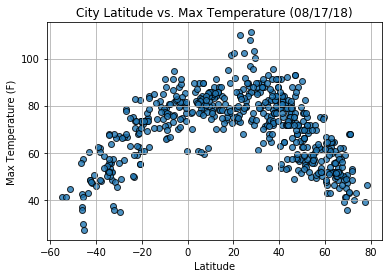

In [8]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Max_Temperature.png")

# Show plot
plt.show()

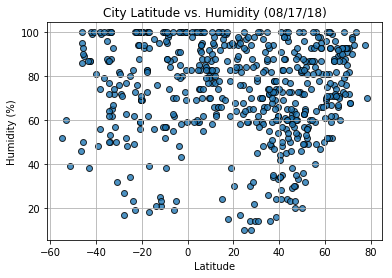

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

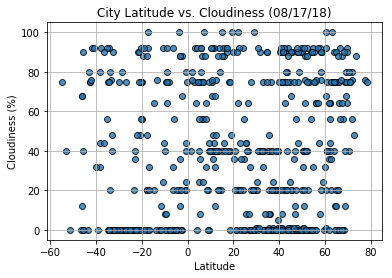

In [10]:

# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

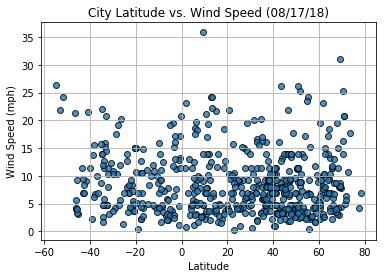

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind Speed.png")

# Show plot
plt.show()
